# Part1: Importing all the libraries to be used

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
import nltk
from nltk.corpus import stopwords    # For stopwords
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from nltk.stem.porter import PorterStemmer
import string
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle

# Part2: Loading data

### 2.1 | show data

In [4]:
data = pd.read_csv("../datasets/spam.csv",encoding='latin1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
styled_df = data.head()
styled_df = styled_df.head().style.set_properties(**{
    'background-color': '#F5F5F5',  # Light gray background for overall look
    'color': '#333333',             # Darker text color for readability
    'border': '1px solid #DDDDDD',  # Light border around each cell
    'font-family': 'Arial',         # Font for readability
    'text-align': 'left'            # Left-align text
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#e9a3d4'), ('color', '#FFFFFF'), ('font-weight', 'bold')]}  # Soft pink header with white bold text
])

# Display the styled DataFrame
styled_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",nan,nan,nan
1,ham,Ok lar... Joking wif u oni...,nan,nan,nan
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,nan,nan,nan
3,ham,U dun say so early hor... U c already then say...,nan,nan,nan
4,ham,"Nah I don't think he goes to usf, he lives around here though",nan,nan,nan


### 2.2 | data cleaning

In [6]:
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
styled_df = data.head()
styled_df = styled_df.head().style.set_properties(**{
    'background-color': '#F5F5F5',  # Light gray background for overall look
    'color': '#333333',             # Darker text color for readability
    'border': '1px solid #DDDDDD',  # Light border around each cell
    'font-family': 'Arial',         # Font for readability
    'text-align': 'left'            # Left-align text
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#e9a3d4'), ('color', '#FFFFFF'), ('font-weight', 'bold')]}  # Soft pink header with white bold text
])

# Display the styled DataFrame
styled_df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [8]:
data.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)
styled_df = data.head()
styled_df = styled_df.head().style.set_properties(**{
    'background-color': '#F5F5F5',  # Light gray background for overall look
    'color': '#333333',             # Darker text color for readability
    'border': '1px solid #DDDDDD',  # Light border around each cell
    'font-family': 'Arial',         # Font for readability
    'text-align': 'left'            # Left-align text
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#e9a3d4'), ('color', '#FFFFFF'), ('font-weight', 'bold')]}  # Soft pink header with white bold text
])

# Display the styled DataFrame
styled_df

,target,text
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [9]:
data.isnull().sum()   # 统计非空值

target    0
text      0
dtype: int64

In [10]:
data.duplicated().sum()   # 统计重复值
data = data.drop_duplicates(keep = 'first')  # 保留第一个出现的

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   object
 1   text    5169 non-null   object
dtypes: object(2)
memory usage: 121.1+ KB


# Part3: data exploration

### 3.1 | Email Classification Count

C:\Users\王泓烨\AppData\Local\Temp\ipykernel_23440\3100144693.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg = sns.countplot(x= data["target"], palette= cols)


Text(0, 0.5, 'Number of Data points')

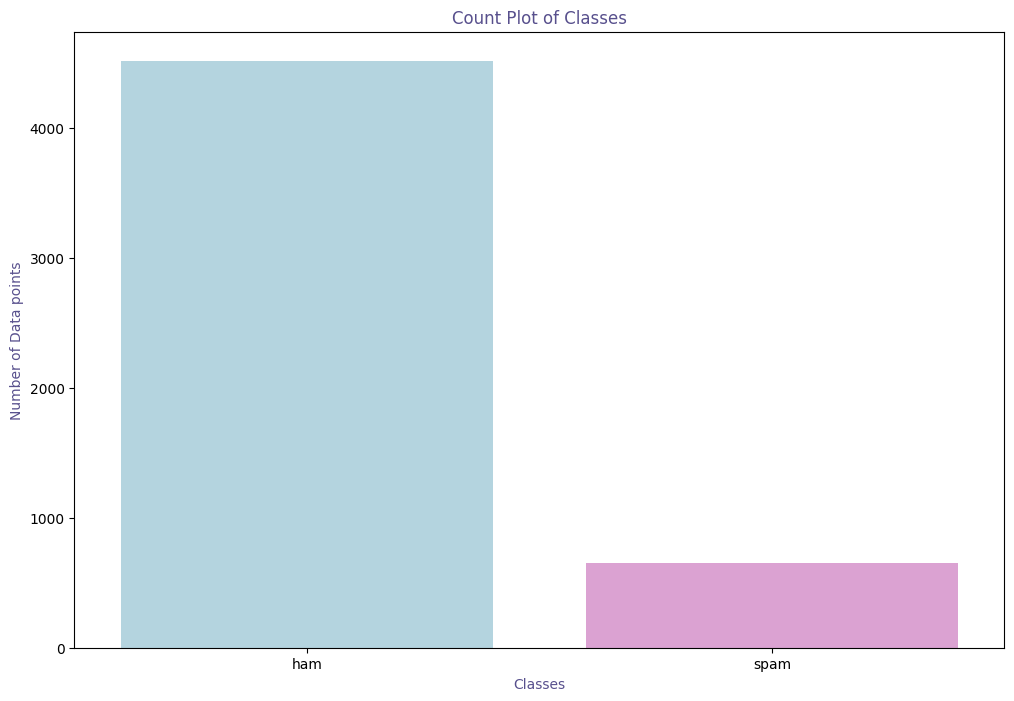

In [12]:
#Palette
cols= ["#ADD8E6", "#E598D8"] 
#first of all let us evaluate the target and find out if our data is imbalanced or not
plt.figure(figsize=(12,8))
fg = sns.countplot(x= data["target"], palette= cols)
fg.set_title("Count Plot of Classes", color="#58508d")
fg.set_xlabel("Classes", color="#58508d")
fg.set_ylabel("Number of Data points", color="#58508d")

### 3.2 | Text Structure Analysis

In [13]:
data['num_characters'] = data['text'].apply(len)
data['num_words'] = data['text'].apply(lambda x: len(nltk.word_tokenize(x)))
data['num_sentence'] = data['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [14]:
data[['num_characters', 'num_words', 'num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


### 3.3 | Distribution of Number of Characters by Target

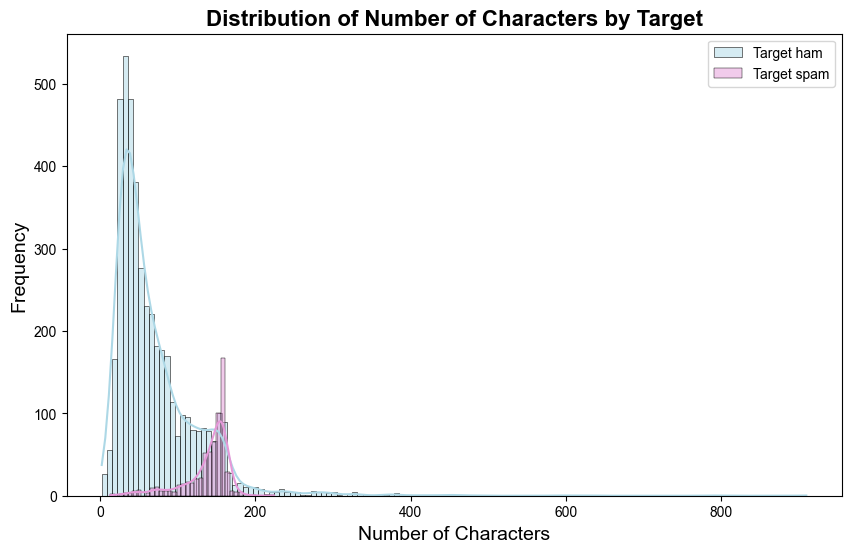

In [15]:
plt.figure(figsize=(10, 6))

sns.histplot(data[data['target'] == 'ham' ]['num_characters'], color='#ADD8E6', label='Target ham', kde=True)

sns.histplot(data[data['target'] == 'spam' ]['num_characters'], color='#E598D8', label='Target spam', kde=True)

plt.xlabel('Number of Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Characters by Target', fontsize=16, fontweight='bold')

plt.legend()
sns.set(style='whitegrid') 
plt.show()

### 3.4 | Distribution of Number of Words by Target

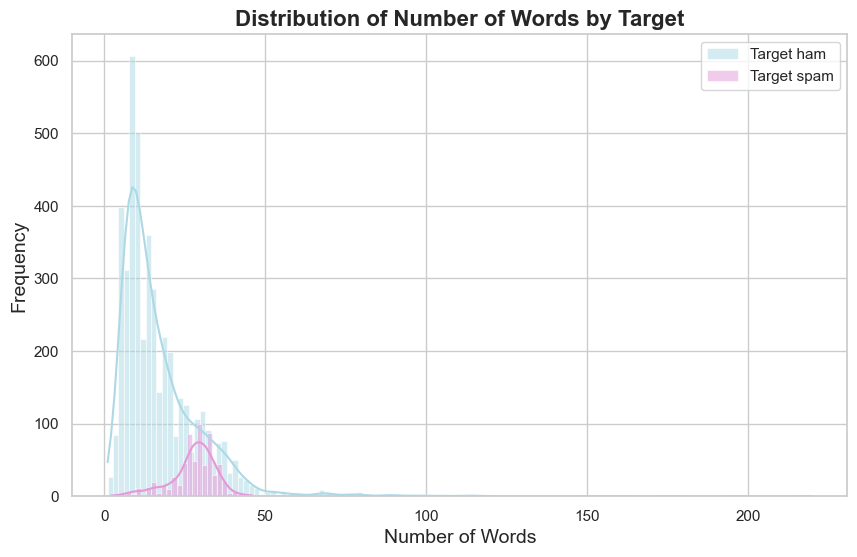

In [16]:
# Create a figure and set the figure size
plt.figure(figsize=(10, 6))

# Plot the histogram for target 0 in blue
sns.histplot(data[data['target'] == 'ham' ]['num_words'], color='#ADD8E6', label='Target ham', kde=True)

# Plot the histogram for target 1 in red
sns.histplot(data[data['target'] == 'spam' ]['num_words'], color='#E598D8', label='Target spam', kde=True)

# Add labels and a title
plt.xlabel('Number of Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Number of Words by Target', fontsize=16, fontweight='bold')

# Add a legend
plt.legend()

# Customize the appearance of the plot
sns.set(style='whitegrid')  # Add a white grid background

# Show the plot
plt.show()

### 3.5 | PairPlot

<Figure size 1200x800 with 0 Axes>

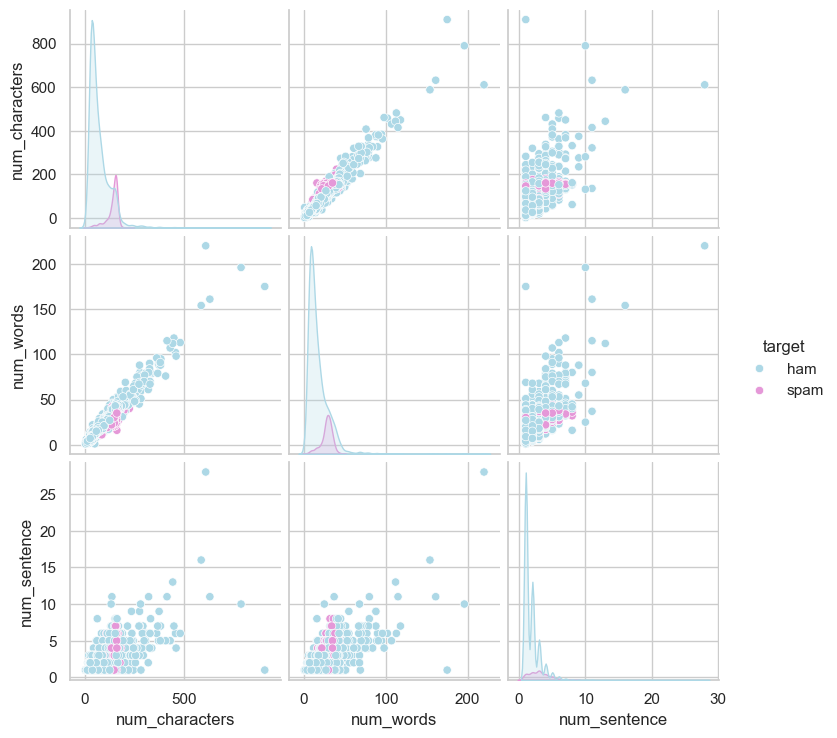

In [17]:
plt.figure(figsize=(12,8))
fg = sns.pairplot(data=data, hue="target",palette=cols)
plt.show(fg)

### 3.6 | Correlation Heatmap--'target', 'num_characters', 'num_words', 'num_sentence'

In [18]:
encoder = LabelEncoder()
data['target'] = encoder.fit_transform(data['target'])

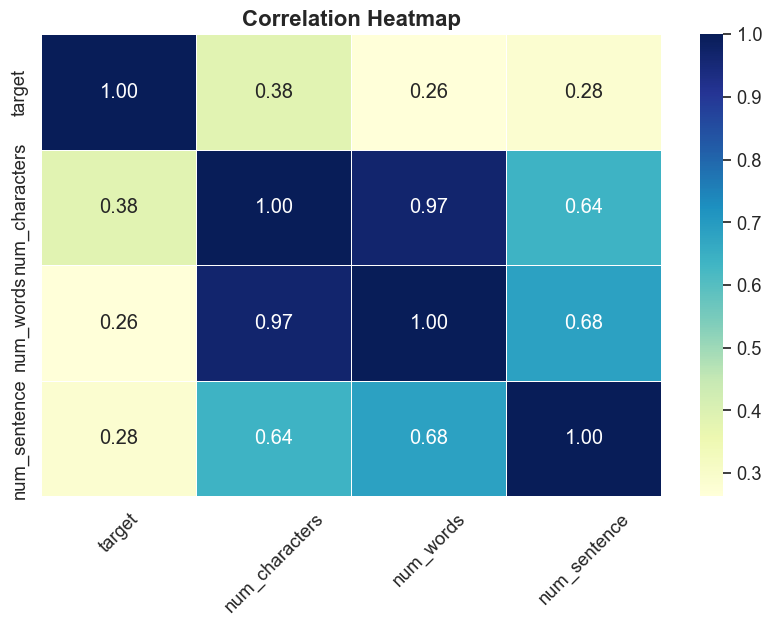

In [19]:
# Select the columns for the correlation matrix
correlation_matrix = data[['target', 'num_characters', 'num_words', 'num_sentence']].corr()

# Create a heatmap with custom styling
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)  # Adjust font scale for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5, fmt=".2f")

# Set a title for the heatmap
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the heatmap
plt.show()

# Part4: preprocessing data

### 4.1 | Standardize and clean data
#### 步骤：
#### 1、转换为小写
#### 2、分词
#### 3、去除特殊字符和停用词
#### 4、进行词干提取。

In [22]:
# Creating an instance of the Porter Stemmer
ps = PorterStemmer()

# Lowercase transformation and text preprocessing function
def transform_text(text):
    # Transform the text to lowercase
    text = text.lower()
    
    # Tokenization using NLTK
    text = nltk.word_tokenize(text)
    
    # Removing special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    # Removing stop words and punctuation
    text = y[:]
    y.clear()
    
    # Loop through the tokens and remove stopwords and punctuation|
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
        
    # Stemming using Porter Stemmer
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    # Join the processed tokens back into a single string
    return " ".join(y)

In [23]:
data['transformed_text'] = data['text'].apply(transform_text)

In [24]:
styled_df = data.head()
styled_df = styled_df.head().style.set_properties(**{
    'background-color': '#F5F5F5',  # Light gray background for overall look
    'color': '#333333',             # Darker text color for readability
    'border': '1px solid #DDDDDD',  # Light border around each cell
    'font-family': 'Arial',         # Font for readability
    'text-align': 'left'            # Left-align text
}).set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#e9a3d4'), ('color', '#FFFFFF'), ('font-weight', 'bold')]}  # Soft pink header with white bold text
])

# Display the styled DataFrame
styled_df

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,24,2,go jurong point crazi avail bugi n great world la e buffet cine got amor wat
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,37,2,free entri 2 wkli comp win fa cup final tkt 21st may text fa 87121 receiv entri question std txt rate c appli 08452810075over18
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives around here though",61,15,1,nah think goe usf live around though


### 4.2 | Word Cloud for Spam Messages

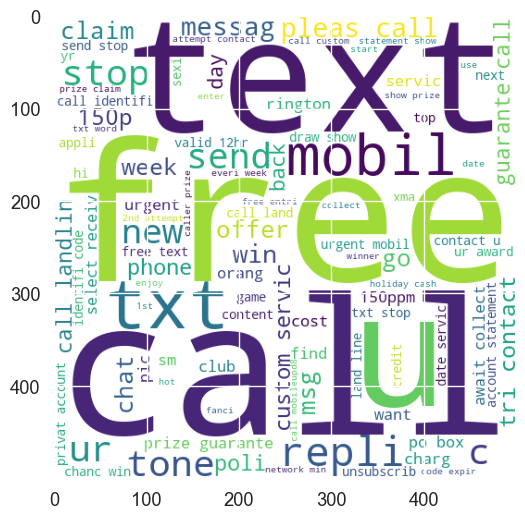

In [25]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')
spam_wc = wc.generate(data[data['target'] == 1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)
plt.show()

### 4.2 | Word Cloud for Ham Messages

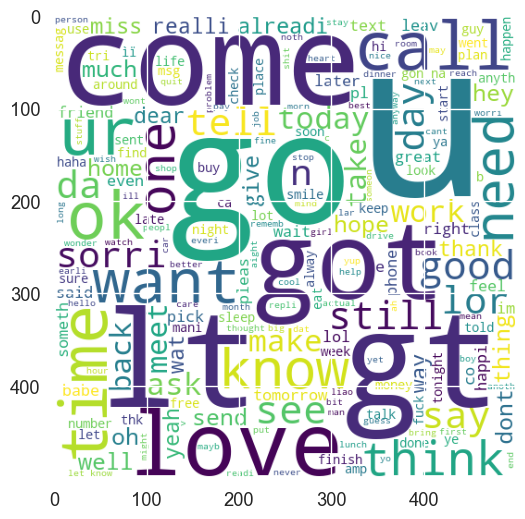

In [26]:
ham_wc = wc.generate(data[data['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)
plt.show()

### 4.3 | Find top 30 words of spam

In [27]:
spam_carpos = []
for sentence in data[data['target'] == 1]['transformed_text'].tolist():
    for word in sentence.split():
        spam_carpos.append(word)

In [28]:
filter_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\王泓烨\AppData\Local\Temp\ipykernel_23440\3958184924.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_df, x = filter_df[0], y =filter_df[1] , palette='magma')


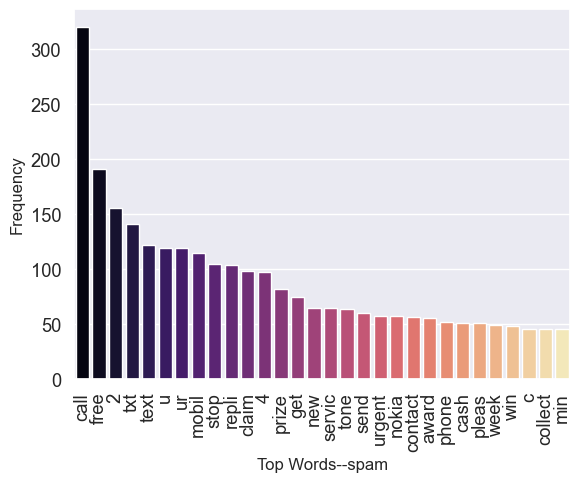

In [29]:
sns.barplot(data = filter_df, x = filter_df[0], y =filter_df[1] , palette='magma')
plt.xlabel("Top Words--spam", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation = 90)
plt.show()

### 4.4 | Find top 30 words of ham

In [30]:
ham_carpos = []
for sentence in data[data['target'] == 0]['transformed_text'].tolist():
    for word in sentence.split():
        ham_carpos.append(word)

In [31]:
filter_ham_df = pd.DataFrame(Counter(spam_carpos).most_common(30))

C:\Users\王泓烨\AppData\Local\Temp\ipykernel_23440\2795030594.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = filter_ham_df, x = filter_df[0], y =filter_df[1] , palette='magma')


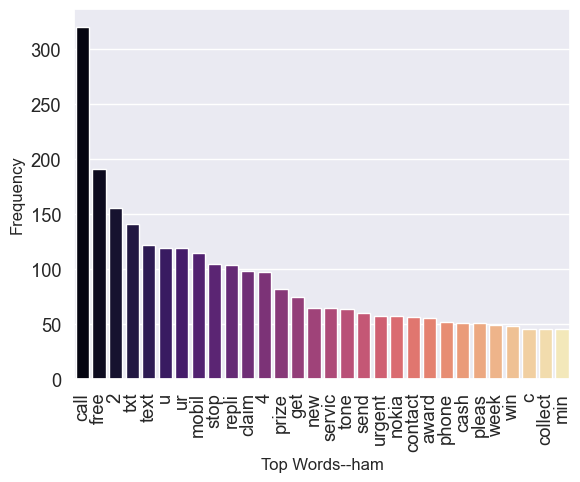

In [32]:
sns.barplot(data = filter_ham_df, x = filter_df[0], y =filter_df[1] , palette='magma')
plt.xlabel("Top Words--ham", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation = 90)
plt.show()

# Part5: data split

### 5.1 | Identify the independent and dependent variables
##### save textdata
##### Convert text data into a numerical feature matrix

In [33]:
data.to_csv('../datasets/text_data.csv', index=True) 

In [34]:
tfid = TfidfVectorizer(max_features=3000)

In [35]:
X = tfid.fit_transform(data['transformed_text']).toarray()
y = data['target'].values

### 5.2 | Split into Train and Test Data
#### train : test = 8:2

In [36]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

In [37]:
with open('../datasets/train_test_data.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)